<a href="https://colab.research.google.com/github/Prasadkurapati/Deep-learning-1/blob/main/ADV_MODELS_OF_DEEP_LEARNING_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/01_Getting_Started.ipynb)

# Chapter 1 - An Introduction to PyTorch

## Verifying Your PyTorch Setup

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu124
True


## Initial Cells

In [2]:
import urllib.request
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Fimmvorduhals_2010_03_27_dawn.jpg/640px-Fimmvorduhals_2010_03_27_dawn.jpg'
fpath = 'volcano.jpg'
urllib.request.urlretrieve(url, fpath)

('volcano.jpg', <http.client.HTTPMessage at 0x7b46570d76d0>)

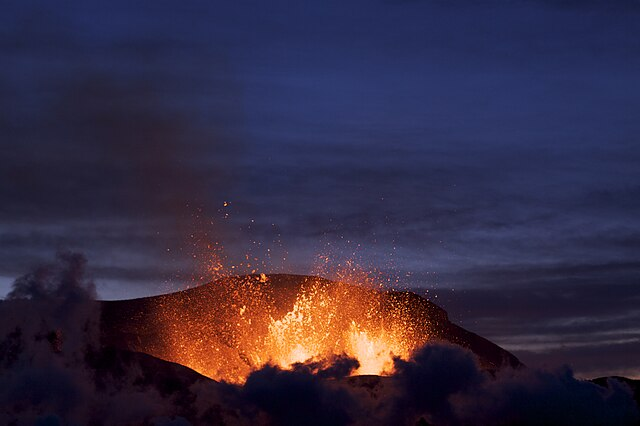

In [3]:
from PIL import Image

img = Image.open('volcano.jpg')
img

In [4]:
#Cell A
from torchvision import transforms

transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
print(type(img_tensor), img_tensor.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


The image was resized, center croped,converted to tensor and then normalized, that is why the size is 3 X 224 X 224

In [5]:
# Cell B
transformB = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensorB = transformB(img)
print(type(img_tensorB), img_tensorB.shape)

<class 'torch.Tensor'> torch.Size([3, 426, 640])


The image converted to tensor and ten  normalized, that is why the the tensor presered the orginal image size is 3 X 426 X 640

In [6]:
#Cell C

transformC = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor()])

img_tensorC = transformC(img)
print(type(img_tensorC), img_tensorC.shape)

<class 'torch.Tensor'> torch.Size([3, 224, 224])


The image resized, centercropped and converted to tensor that is why the the  image size is 3 X 224 X 224

In [7]:
#Cell D
transformD = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensorD = transformD(img)
print(type(img_tensorD), img_tensorD.shape)

TypeError: img should be Tensor Image. Got <class 'PIL.Image.Image'>

### Error Explanation
`transforms.Normalize` needs the input type as `torch.Tensor` but the current input type is `PIL.Image.Image`

In [8]:
batch = torch.unsqueeze(img_tensor, 0)
print(batch.shape)

torch.Size([1, 3, 224, 224])


# Get Classs Labels

In [9]:
import urllib.request
url = "https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/imagenet_class_labels.txt"
fpath = 'imagenet_class_labels.txt'
urllib.request.urlretrieve(url, fpath)

with open('imagenet_class_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

# Process Image

In [10]:
import torch
from torchvision import transforms, models
transform = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=[0.485, 0.456, 0.406],
      std=[0.229, 0.224, 0.225])])

img_tensor = transform(img)
batch = torch.unsqueeze(img_tensor, 0)

# AlexNet

```from torchvision import models
model = models.alexnet(pretrained=True)```

**NOTE :** This is the older Pythorch version, never version uses below syntax

In [11]:
from torchvision.models import AlexNet_Weights
alexnet_model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)

device = "cuda" if torch.cuda.is_available() else "cpu"
alexnet_model.eval()
alexnet_model.to(device)
y = alexnet_model(batch.to(device))

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 143MB/s]


980: 'volcano', 89.04768371582031
562: 'fountain', 2.31286883354187
755: 'radio telescope, radio reflector', 2.0702054500579834
974: 'geyser', 0.6575477123260498
766: 'rotisserie', 0.627539873123169


# VGG16

In [12]:
from torchvision.models import VGG16_Weights
vgg_model = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

device = "cuda" if torch.cuda.is_available() else "cpu"
vgg_model.eval()
vgg_model.to(device)
y = vgg_model(batch.to(device))

prob = torch.nn.functional.softmax(y, dim=1)[0] * 100
_, indices = torch.sort(y, descending=True)
for idx in indices[0][:5]:
  print(classes[idx], prob[idx].item())

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 99.2MB/s]


980: 'volcano', 84.38665008544922
974: 'geyser', 6.696654796600342
562: 'fountain', 1.3349748849868774
437: 'beacon, lighthouse, beacon light, pharos', 0.5439481735229492
979: 'valley, vale', 0.36428165435791016


# Q1 Does the 1000-label ImageNet contain your word
Yes label does contain my form (my word is volcano)

In [13]:
import re
for i in classes:
  text = re.findall(r'"(.*?)"|\'(.*?)\'', i)[0][1]
  if 'volcano' in text:
    print(i)

980: 'volcano',


# Alxnet

## Q1 What is the classification result (label)?

Ans: 'volcano'

## Q2 What are the similar labels in ImageNet
- 980: 'volcano'




## Q3 What is the confidence of the classification result

Ans: 89.04 %

# VGG16

## Q1 What is the classification result (label)?

Ans: 'volcano'

## Q2 What are the similar labels in ImageNet
- 980: 'volcano'

## Q3 What is the confidence of the classification result

Ans: 84.38 %

# Q Which model is more confident in its decision about your image?
Alexnet is more confident in its decisions

# Do decisions differ?

Both models produced identical classification results, but their confidence scores differed. A confidence score reflects the model’s certainty in its prediction-not its overall quality. A higher confidence score does not inherently make one model superior to the other. However, if a model maintains consistent confidence scores alongside high accuracy, it could indicate better reliability. Conversely, a model with high confidence scores but low accuracy may be overfitting, as it demonstrates unwarranted certainty in incorrect predictions.

In [14]:
!pip install torchinfo

In [15]:
from torchinfo import summary
summary(alexnet_model, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [16, 1000]                --
+ Sequential: 1-1                        [16, 256, 6, 6]           --
|    + Conv2d: 2-1                       [16, 64, 55, 55]          23,296
|    + ReLU: 2-2                         [16, 64, 55, 55]          --
|    + MaxPool2d: 2-3                    [16, 64, 27, 27]          --
|    + Conv2d: 2-4                       [16, 192, 27, 27]         307,392
|    + ReLU: 2-5                         [16, 192, 27, 27]         --
|    + MaxPool2d: 2-6                    [16, 192, 13, 13]         --
|    + Conv2d: 2-7                       [16, 384, 13, 13]         663,936
|    + ReLU: 2-8                         [16, 384, 13, 13]         --
|    + Conv2d: 2-9                       [16, 256, 13, 13]         884,992
|    + ReLU: 2-10                        [16, 256, 13, 13]         --
|    + Conv2d: 2-11                      [16, 256, 13, 13]        

In [16]:
summary(vgg_model, input_size=(16, 3, 224, 224), row_settings=("depth", "ascii_only"))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 1000]                --
+ Sequential: 1-1                        [16, 512, 7, 7]           --
|    + Conv2d: 2-1                       [16, 64, 224, 224]        1,792
|    + ReLU: 2-2                         [16, 64, 224, 224]        --
|    + Conv2d: 2-3                       [16, 64, 224, 224]        36,928
|    + ReLU: 2-4                         [16, 64, 224, 224]        --
|    + MaxPool2d: 2-5                    [16, 64, 112, 112]        --
|    + Conv2d: 2-6                       [16, 128, 112, 112]       73,856
|    + ReLU: 2-7                         [16, 128, 112, 112]       --
|    + Conv2d: 2-8                       [16, 128, 112, 112]       147,584
|    + ReLU: 2-9                         [16, 128, 112, 112]       --
|    + MaxPool2d: 2-10                   [16, 128, 56, 56]         --
|    + Conv2d: 2-11                      [16, 256, 56, 56]         29

## Q What is the number of parameters you obtain for alexnet and vgg16, respectively

Ans
1. Alexnet : 61,100,840
2. vgg16 : 138,357,544

# Introduction

Hello, I’m Durga Prasad Kurapati, a graduate student pursuing an MS in Data Science at Rowan University. My academic journey began with a Bachelor of Computer Applications from Prabhas Degree College (Krishna University, India), where I developed a strong foundation in Machine Learning, Neural Networks, Linear Algebra, and Probability. At Rowan, I’ve expanded this knowledge through advanced coursework in Probability, Data Mining, and Distributed Systems.

Professionally, I previously served as a Software Developer in Cloud Engineering at Techintelli, where I designed and maintained cloud-native applications on AWS, Azure, and Google Cloud. My work focused on data integration, API development, and optimizing cloud infrastructure, equipping me with hands-on experience in building scalable, resilient systems.

Currently, I am started working on my own project to build a **real-time human identification** system, This project leverages frameworks like TensorFlow and computer vision libraries to explore cutting-edge applications of AI, deepening my understanding of real-time inference, model optimization, and scalable deployment. Alongside this, I am refining my technical fluency in tools like NumPy, Pandas, PIL, and Matplotlib to bridge theoretical concepts with practical implementation.

I am passionate about merging my cloud engineering background with advanced AI/ML techniques to solve complex problems—whether in real-time systems, distributed computing, or innovative deep learning applications.
